# Temporal Anlaysis of Message distribution

In [16]:
import pandas as pd


In [17]:
# import datasets
df = pd.read_json("../../Datasets/voluntariosdanavalencia_old.json") # Import data from Voluntarios de Valencia groupchat.

## Distribution of all messages

In [18]:
# Check data structure
print(df.shape)
print(df.columns)
df.head()

(18064, 17)
Index(['id', 'date', 'message', 'reply_to_msg_id', 'views', 'forwards',
       'edit_date', 'pinned', 'post_author', 'sender_id', 'sender_username',
       'sender_name', 'has_media', 'reactions', 'subgroup', 'topic_name',
       'reply'],
      dtype='object')


,id,date,message,reply_to_msg_id,views,forwards,edit_date,pinned,post_author,sender_id,sender_username,sender_name,has_media,reactions,subgroup,topic_name,reply
0,3,2024-10-30 12:39:24+00:00,Os paso por aquí el correo,NaN,NaN,NaN,None,False,NaN,1110241832,Manuel_deRonde,Manuel DeRonde - Coordinador Civil 🫱🏻‍🫲🏼,False,[],None,Discusión general,False
1,4,2024-10-30 12:40:50+00:00,LO AVISÉ EL VIERNES PASADO Y NADIE ME HIZO CAS...,NaN,46823.0,1057.0,2024-11-01T18:21:38+00:00,False,NaN,1110241832,Manuel_deRonde,Manuel DeRonde - Coordinador Civil 🫱🏻‍🫲🏼,True,"[{'user_id': 5887977931, 'username': '', 'disp...",None,Discusión general,False
2,5,2024-10-30 12:43:17+00:00,,NaN,NaN,NaN,2024-11-03T22:44:05+00:00,False,NaN,1110241832,Manuel_deRonde,Manuel DeRonde - Coordinador Civil 🫱🏻‍🫲🏼,True,"[{'user_id': 6970134793, 'username': '', 'disp...",None,Discusión general,False
3,6,2024-10-30 12:43:23+00:00,Probad si podeis,NaN,NaN,NaN,None,False,NaN,1110241832,Manuel_deRonde,Manuel DeRonde - Coordinador Civil 🫱🏻‍🫲🏼,False,[],None,Discusión general,False
4,7,2024-10-30 12:46:02+00:00,Durante la tormenta al parecer sí estaba opera...,4.0,NaN,NaN,None,False,NaN,941865373,Camelocota,Víctor Conejero,False,[],Thread_4,Discusión general,True


In [19]:
# Convert date to datetime and sort by time
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date').reset_index(drop=True)

print(f"Total messages: {len(df)}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")

Total messages: 18064
Date range: 2024-10-30 12:39:24+00:00 to 2025-11-10 11:06:47+00:00


In [20]:
# Calculate waiting times (inter-arrival times) between consecutive messages
import numpy as np

# Calculate time differences in seconds
df['waiting_time'] = df['date'].diff().dt.total_seconds()

# Remove the first NaN value and negative values (if any)
waiting_times = df['waiting_time'].dropna()
waiting_times = waiting_times[waiting_times > 0]

print(f"Number of waiting times: {len(waiting_times)}")
print(f"Statistics:")
print(f"  Mean: {waiting_times.mean():.2f} seconds ({waiting_times.mean()/60:.2f} minutes)")
print(f"  Median: {waiting_times.median():.2f} seconds ({waiting_times.median()/60:.2f} minutes)")
print(f"  Min: {waiting_times.min():.2f} seconds")
print(f"  Max: {waiting_times.max():.2f} seconds ({waiting_times.max()/3600:.2f} hours)")

Number of waiting times: 17203
Statistics:
  Mean: 1888.09 seconds (31.47 minutes)
  Median: 38.00 seconds (0.63 minutes)
  Min: 1.00 seconds
  Max: 1076522.00 seconds (299.03 hours)


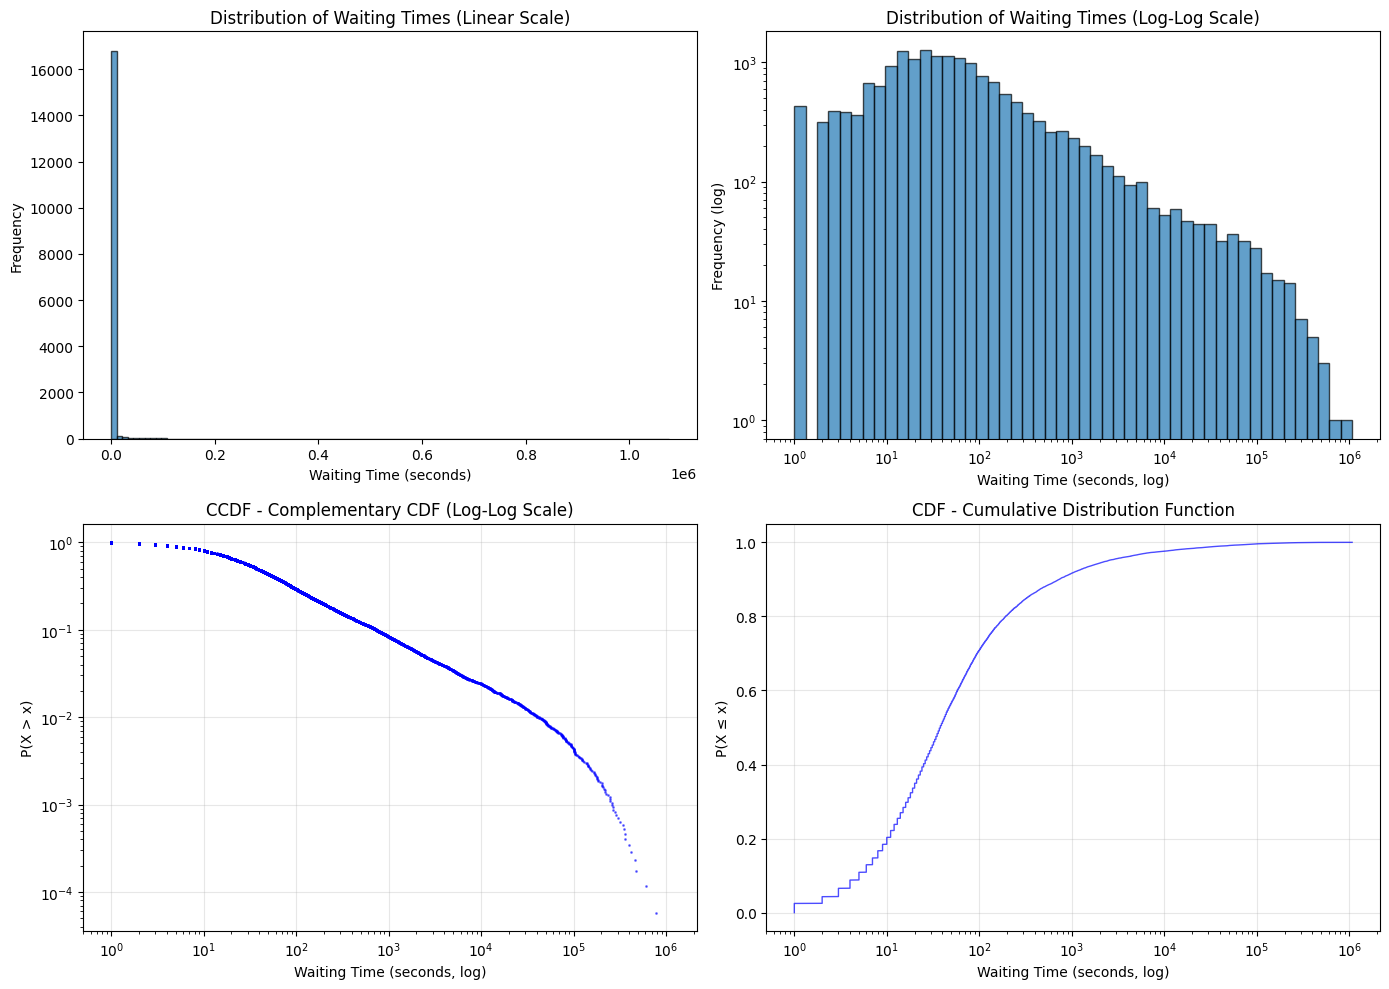

In [21]:
# Visualize the distribution
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram on linear scale
axes[0, 0].hist(waiting_times, bins=100, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Waiting Time (seconds)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Waiting Times (Linear Scale)')

# Histogram on log-log scale
axes[0, 1].hist(waiting_times, bins=np.logspace(np.log10(waiting_times.min()), 
                                                  np.log10(waiting_times.max()), 50),
                edgecolor='black', alpha=0.7)
axes[0, 1].set_xscale('log')
axes[0, 1].set_yscale('log')
axes[0, 1].set_xlabel('Waiting Time (seconds, log)')
axes[0, 1].set_ylabel('Frequency (log)')
axes[0, 1].set_title('Distribution of Waiting Times (Log-Log Scale)')

# CCDF (Complementary Cumulative Distribution Function) on log-log scale
sorted_times = np.sort(waiting_times)
ccdf = 1 - np.arange(1, len(sorted_times) + 1) / len(sorted_times)
axes[1, 0].plot(sorted_times, ccdf, 'b.', alpha=0.5, markersize=2)
axes[1, 0].set_xscale('log')
axes[1, 0].set_yscale('log')
axes[1, 0].set_xlabel('Waiting Time (seconds, log)')
axes[1, 0].set_ylabel('P(X > x)')
axes[1, 0].set_title('CCDF - Complementary CDF (Log-Log Scale)')
axes[1, 0].grid(True, alpha=0.3)

# CDF
axes[1, 1].plot(sorted_times, np.arange(1, len(sorted_times) + 1) / len(sorted_times), 
                'b-', alpha=0.7, linewidth=1)
axes[1, 1].set_xscale('log')
axes[1, 1].set_xlabel('Waiting Time (seconds, log)')
axes[1, 1].set_ylabel('P(X ≤ x)')
axes[1, 1].set_title('CDF - Cumulative Distribution Function')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Power Law Fitting

We'll use the `powerlaw` package to test if the data follows a power law distribution and compare it with alternative distributions.

In [22]:
# Install powerlaw package if not already installed
# !pip install powerlaw

In [23]:
import powerlaw

# Fit power law to the data
fit = powerlaw.Fit(waiting_times.values, discrete=False, verbose=False)

print("="*60)
print("POWER LAW FIT RESULTS")
print("="*60)
print(f"Power law exponent (alpha): {fit.power_law.alpha:.3f}")
print(f"xmin (minimum value for power law): {fit.power_law.xmin:.2f} seconds")
print(f"Data points above xmin: {sum(waiting_times >= fit.power_law.xmin)}")
print(f"Percentage of data: {100 * sum(waiting_times >= fit.power_law.xmin) / len(waiting_times):.2f}%")
print(f"Standard error: {fit.power_law.sigma:.3f}")
print("="*60)

POWER LAW FIT RESULTS
Power law exponent (alpha): 1.564
xmin (minimum value for power law): 46.00 seconds
Data points above xmin: 7813
Percentage of data: 45.42%
Standard error: 0.006


In [24]:
# Compare power law with alternative distributions
print("\n" + "="*60)
print("DISTRIBUTION COMPARISON (Likelihood Ratio Tests)")
print("="*60)

# Compare with exponential
R_exp, p_exp = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print(f"\nPower Law vs Exponential:")
print(f"  Log-likelihood ratio (R): {R_exp:.3f}")
print(f"  p-value: {p_exp:.4f}")
if p_exp < 0.05:
    if R_exp > 0:
        print(f"  ✓ Power law is significantly better (p < 0.05)")
    else:
        print(f"  ✗ Exponential is significantly better (p < 0.05)")
else:
    print(f"  ≈ No significant difference (p ≥ 0.05)")

# Compare with lognormal
R_ln, p_ln = fit.distribution_compare('power_law', 'lognormal', normalized_ratio=True)
print(f"\nPower Law vs Lognormal:")
print(f"  Log-likelihood ratio (R): {R_ln:.3f}")
print(f"  p-value: {p_ln:.4f}")
if p_ln < 0.05:
    if R_ln > 0:
        print(f"  ✓ Power law is significantly better (p < 0.05)")
    else:
        print(f"  ✗ Lognormal is significantly better (p < 0.05)")
else:
    print(f"  ≈ No significant difference (p ≥ 0.05)")

# Compare with truncated power law
R_tpl, p_tpl = fit.distribution_compare('power_law', 'truncated_power_law', normalized_ratio=True)
print(f"\nPower Law vs Truncated Power Law:")
print(f"  Log-likelihood ratio (R): {R_tpl:.3f}")
print(f"  p-value: {p_tpl:.4f}")
if p_tpl < 0.05:
    if R_tpl > 0:
        print(f"  ✓ Power law is significantly better (p < 0.05)")
    else:
        print(f"  ✗ Truncated power law is significantly better (p < 0.05)")
else:
    print(f"  ≈ No significant difference (p ≥ 0.05)")

print("="*60)


DISTRIBUTION COMPARISON (Likelihood Ratio Tests)

Power Law vs Exponential:
  Log-likelihood ratio (R): 31.880
  p-value: 0.0000
  ✓ Power law is significantly better (p < 0.05)

Power Law vs Lognormal:
  Log-likelihood ratio (R): -1.968
  p-value: 0.0490
  ✗ Lognormal is significantly better (p < 0.05)


Assuming nested distributions



Power Law vs Truncated Power Law:
  Log-likelihood ratio (R): -8.474
  p-value: 0.0000
  ✗ Truncated power law is significantly better (p < 0.05)


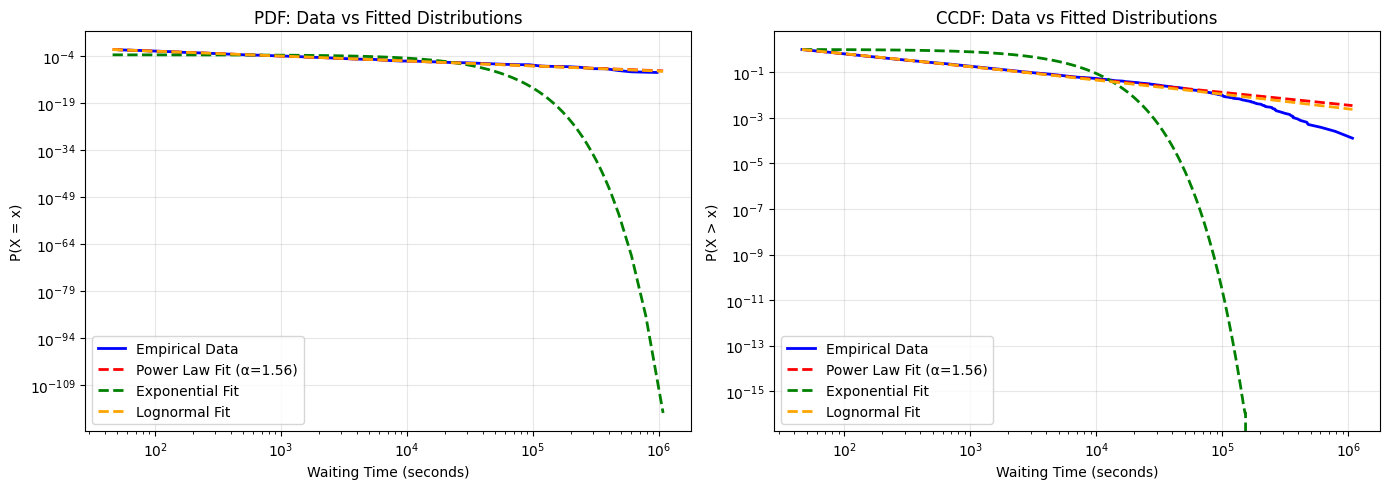

In [25]:
# Visualize the fit
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot with powerlaw's built-in method
fit.plot_pdf(color='b', linewidth=2, label='Empirical Data', ax=axes[0])
fit.power_law.plot_pdf(color='r', linestyle='--', linewidth=2, label=f'Power Law Fit (α={fit.power_law.alpha:.2f})', ax=axes[0])
fit.exponential.plot_pdf(color='g', linestyle='--', linewidth=2, label='Exponential Fit', ax=axes[0])
fit.lognormal.plot_pdf(color='orange', linestyle='--', linewidth=2, label='Lognormal Fit', ax=axes[0])
axes[0].set_xlabel('Waiting Time (seconds)')
axes[0].set_ylabel('P(X = x)')
axes[0].set_title('PDF: Data vs Fitted Distributions')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot CCDF
fit.plot_ccdf(color='b', linewidth=2, label='Empirical Data', ax=axes[1])
fit.power_law.plot_ccdf(color='r', linestyle='--', linewidth=2, label=f'Power Law Fit (α={fit.power_law.alpha:.2f})', ax=axes[1])
fit.exponential.plot_ccdf(color='g', linestyle='--', linewidth=2, label='Exponential Fit', ax=axes[1])
fit.lognormal.plot_ccdf(color='orange', linestyle='--', linewidth=2, label='Lognormal Fit', ax=axes[1])
axes[1].set_xlabel('Waiting Time (seconds)')
axes[1].set_ylabel('P(X > x)')
axes[1].set_title('CCDF: Data vs Fitted Distributions')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Note on KS distance
Recent `powerlaw` versions can raise a `compute_distance_metrics` NameError when calling `powerlaw.KS()` in some environments. The KS distance is computed manually in the next cell to avoid this issue.

In [26]:
# Goodness of fit test (Kolmogorov-Smirnov)
# This compares the fitted distribution to the empirical data
print("\n" + "="*60)
print("GOODNESS OF FIT (Kolmogorov-Smirnov Distance)")
print("="*60)

# Manual KS distance to avoid powerlaw.KS() NameError in some versions
data = np.asarray(fit.data)
data = np.sort(data[data >= fit.power_law.xmin])
n = len(data)
if n == 0:
    ks_distance = float("nan")
else:
    empirical_cdf = np.arange(1, n + 1) / n
    try:
        model_cdf = fit.power_law.cdf(data)
    except Exception:
        model_cdf = 1 - fit.power_law.ccdf(data)
    ks_distance = np.max(np.abs(empirical_cdf - model_cdf))

print(f"KS distance for power law: {ks_distance:.4f}")
print(f"\nInterpretation:")
print(f"  - KS distance measures the maximum vertical distance between")
print(f"    the empirical CDF and the fitted CDF")
print(f"  - Smaller values indicate better fit")
print(f"  - Typically, KS < 0.1 suggests reasonable fit")
if np.isnan(ks_distance):
    print(f"  ! KS distance could not be computed (no data >= xmin)")
elif ks_distance < 0.1:
    print(f"  ✓ Good fit (KS < 0.1)")
elif ks_distance < 0.15:
    print(f"  ~ Moderate fit (0.1 ≤ KS < 0.15)")
else:
    print(f"  ✗ Poor fit (KS ≥ 0.15)")
print("="*60)


GOODNESS OF FIT (Kolmogorov-Smirnov Distance)
KS distance for power law: 0.0116

Interpretation:
  - KS distance measures the maximum vertical distance between
    the empirical CDF and the fitted CDF
  - Smaller values indicate better fit
  - Typically, KS < 0.1 suggests reasonable fit
  ✓ Good fit (KS < 0.1)


## Distribution model selection (MLE + AIC/BIC)

We fit several candidate distributions with maximum likelihood and compare them using AIC/BIC. Lower AIC/BIC indicates better fit.

In [27]:
# Model selection with MLE and AIC/BIC
import numpy as np
import pandas as pd
from scipy import stats

# Use positive waiting times only
x = waiting_times.values
x = x[np.isfinite(x)]
x = x[x > 0]

def fit_and_score(dist, x, name, fixed_loc=None):
    # Fit distribution parameters via MLE
    if fixed_loc is None:
        params = dist.fit(x)
    else:
        params = dist.fit(x, floc=fixed_loc)
    # Log-likelihood
    logpdf = dist.logpdf(x, *params)
    logpdf = logpdf[np.isfinite(logpdf)]
    ll = np.sum(logpdf)
    k = len(params)
    n = len(x)
    aic = 2 * k - 2 * ll
    bic = np.log(n) * k - 2 * ll
    return {
        "distribution": name,
        "params": params,
        "log_likelihood": ll,
        "k": k,
        "n": n,
        "aic": aic,
        "bic": bic,
    }

candidates = []

# Exponential (force loc=0 for a standard exponential)
candidates.append(fit_and_score(stats.expon, x, "exponential", fixed_loc=0))

# Power law (Pareto). scipy's pareto has support x >= scale.
candidates.append(fit_and_score(stats.pareto, x, "power_law_pareto", fixed_loc=0))

# Log-normal (loc=0 for standard lognormal)
candidates.append(fit_and_score(stats.lognorm, x, "lognormal", fixed_loc=0))

# Weibull (Weibull minimum)
candidates.append(fit_and_score(stats.weibull_min, x, "weibull", fixed_loc=0))

# Log-exponential (a.k.a. log-Laplace). scipy has loglaplace.
candidates.append(fit_and_score(stats.loglaplace, x, "logexp_loglaplace", fixed_loc=0))

results = pd.DataFrame(candidates).sort_values(["aic", "bic"]).reset_index(drop=True)

display_cols = ["distribution", "aic", "bic", "log_likelihood", "k"]
print(results[display_cols])

best_aic = results.loc[0, "distribution"]
best_bic = results.sort_values("bic").loc[0, "distribution"]
print(f"\nBest by AIC: {best_aic}")
print(f"Best by BIC: {best_bic}")

# Show parameters for the best AIC model
best_row = results.loc[0]
print("\nBest (AIC) model parameters:")
print(f"Distribution: {best_row['distribution']}")
print(f"Params: {best_row['params']}")

        distribution            aic            bic  log_likelihood  k
0  logexp_loglaplace  207187.064057  207210.322574  -103590.532029  3
1          lognormal  208150.586284  208173.844802  -104072.293142  3
2   power_law_pareto  215768.094919  215791.353436  -107881.047460  3
3            weibull  216255.669021  216278.927538  -108124.834511  3
4        exponential  293945.535396  293961.041074  -146970.767698  2

Best by AIC: logexp_loglaplace
Best by BIC: logexp_loglaplace

Best (AIC) model parameters:
Distribution: logexp_loglaplace
Params: (np.float64(0.6567311902119792), 0, np.float64(37.99999999999999))


## Fitted PDFs/CCDFs and GOF tests (KS/AD)

We plot empirical PDF/CCDF with the top AIC models and compute KS plus Anderson-Darling where available.

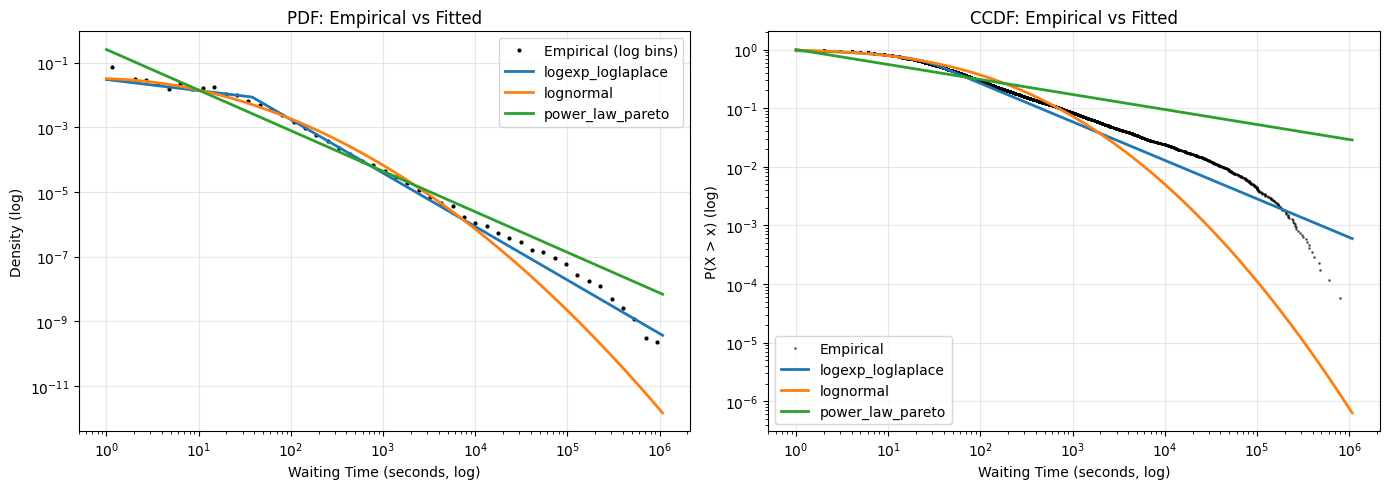

KS test (lower statistic is better):
        distribution   ks_stat     ks_pvalue
0  logexp_loglaplace  0.051292  8.944967e-40
1          lognormal  0.078133  8.624629e-92
3            weibull  0.152113  0.000000e+00
2   power_law_pareto  0.265094  0.000000e+00
4        exponential  0.704039  0.000000e+00

Anderson-Darling test results (compare statistic to critical values):
  distribution       ad_stat                              ad_crit
0  exponential  31165.055812  [0.922, 1.078, 1.341, 1.606, 1.957]


In [28]:
# Plot fitted PDFs/CCDFs for top models and run KS/AD tests
import matplotlib.pyplot as plt

# Map distribution names to scipy objects
name_to_dist = {
    "exponential": stats.expon,
    "power_law_pareto": stats.pareto,
    "lognormal": stats.lognorm,
    "weibull": stats.weibull_min,
    "logexp_loglaplace": stats.loglaplace,
}

# Take top 3 models by AIC for plotting
plot_models = results.sort_values("aic").head(3)

# Empirical CCDF
x_sorted = np.sort(x)
ccdf = 1 - np.arange(1, len(x_sorted) + 1) / len(x_sorted)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Empirical PDF using log-spaced bins (looks better on log-log axes)
log_bins = np.logspace(np.log10(x.min()), np.log10(x.max()), 50)
hist, edges = np.histogram(x, bins=log_bins, density=True)
centers = np.sqrt(edges[:-1] * edges[1:])
mask = hist > 0
axes[0].plot(centers[mask], hist[mask], "k.", markersize=4, label="Empirical (log bins)")

# Empirical CCDF
axes[1].plot(x_sorted, ccdf, "k.", markersize=2, alpha=0.5, label="Empirical")

# Overlay fitted PDFs and CCDFs
x_grid = np.logspace(np.log10(x.min()), np.log10(x.max()), 400)
for _, row in plot_models.iterrows():
    name = row["distribution"]
    dist = name_to_dist[name]
    params = row["params"]
    pdf = dist.pdf(x_grid, *params)
    ccdf_fit = 1 - dist.cdf(x_grid, *params)
    axes[0].plot(x_grid, pdf, linewidth=2, label=f"{name}")
    axes[1].plot(x_grid, ccdf_fit, linewidth=2, label=f"{name}")

axes[0].set_xscale("log")
axes[0].set_yscale("log")
axes[0].set_xlabel("Waiting Time (seconds, log)")
axes[0].set_ylabel("Density (log)")
axes[0].set_title("PDF: Empirical vs Fitted")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].set_xscale("log")
axes[1].set_yscale("log")
axes[1].set_xlabel("Waiting Time (seconds, log)")
axes[1].set_ylabel("P(X > x) (log)")
axes[1].set_title("CCDF: Empirical vs Fitted")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# KS and AD tests
ks_rows = []
ad_rows = []

for _, row in results.iterrows():
    name = row["distribution"]
    dist = name_to_dist[name]
    params = row["params"]

    # Kolmogorov-Smirnov test against fitted CDF
    ks_stat, ks_p = stats.kstest(x, dist.cdf, args=params)
    ks_rows.append({"distribution": name, "ks_stat": ks_stat, "ks_pvalue": ks_p})

    # Anderson-Darling test where supported by scipy
    # Supported: "norm", "expon", "logistic", "gumbel", "gumbel_l", "gumbel_r", "extreme1", "weibull_min"
    if name == "exponential":
        try:
            ad = stats.anderson(x, dist="expon")
            ad_rows.append({"distribution": name, "ad_stat": ad.statistic, "ad_crit": ad.critical_values})
        except Exception:
            pass
    elif name == "weibull":
        try:
            ad = stats.anderson(x, dist="weibull_min")
            ad_rows.append({"distribution": name, "ad_stat": ad.statistic, "ad_crit": ad.critical_values})
        except Exception:
            pass

ks_df = pd.DataFrame(ks_rows).sort_values("ks_stat")
print("KS test (lower statistic is better):")
print(ks_df)

if ad_rows:
    ad_df = pd.DataFrame(ad_rows)
    print("\nAnderson-Darling test results (compare statistic to critical values):")
    print(ad_df)
else:
    print("\nAD test not available for these fitted distributions in scipy.")

### Custom Anderson-Darling for any fitted distribution

This computes the AD statistic for each fitted model using its CDF and estimates a p-value via parametric bootstrap.

In [29]:
# Custom Anderson-Darling statistic + bootstrap p-value for any fitted distribution

def ad_statistic(sample, dist, params):
    # Anderson-Darling for continuous distribution with CDF F
    sample = np.sort(sample)
    n = len(sample)
    # Clip CDF values to avoid log(0)
    cdf_vals = dist.cdf(sample, *params)
    cdf_vals = np.clip(cdf_vals, 1e-12, 1 - 1e-12)
    i = np.arange(1, n + 1)
    s = (2 * i - 1) * (np.log(cdf_vals) + np.log(1 - cdf_vals[::-1]))
    a2 = -n - np.mean(s)
    return a2

# Parametric bootstrap to estimate p-value
# Increase n_boot for more stable p-values (slower)
n_boot = 200
rng = np.random.default_rng(42)

ad_rows_custom = []
for _, row in results.iterrows():
    name = row["distribution"]
    dist = name_to_dist[name]
    params = row["params"]

    a2_obs = ad_statistic(x, dist, params)

    # Bootstrap: simulate from fitted model and recompute AD
    a2_boot = []
    for _ in range(n_boot):
        sim = dist.rvs(*params, size=len(x), random_state=rng)
        a2_boot.append(ad_statistic(sim, dist, params))

    a2_boot = np.asarray(a2_boot)
    p_val = np.mean(a2_boot >= a2_obs)

    ad_rows_custom.append({
        "distribution": name,
        "ad_stat": a2_obs,
        "ad_pvalue": p_val,
    })

ad_custom_df = pd.DataFrame(ad_rows_custom).sort_values("ad_stat")
print("Custom AD test with bootstrap p-values (lower statistic is better):")
print(ad_custom_df)

Custom AD test with bootstrap p-values (lower statistic is better):
        distribution       ad_stat  ad_pvalue
0  logexp_loglaplace     95.959760        0.0
1          lognormal    199.707699        0.0
3            weibull    929.392057        0.0
2   power_law_pareto   2123.191009        0.0
4        exponential  31139.235983        0.0
